In [1]:
# bitsandbytes package might throw an error. Uninstall bitsandbytes package if not needed
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
import torch
import time
import PIL
import requests

In [2]:
model_id = "timbrooks/instruct-pix2pix"

if torch.cuda.is_available():
  device="cuda"
elif torch.xpu.is_available():
  device="xpu"
else:
  device="cpu"

print("Using device:", device)

pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

pipe = pipe.to(device)

Using device: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

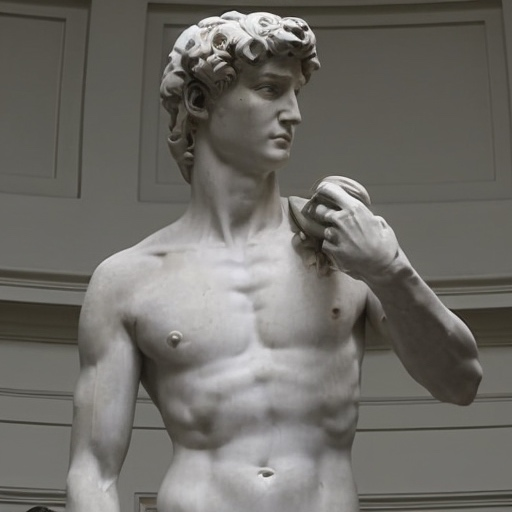

In [3]:
url = "https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg"
image = PIL.Image.open(requests.get(url, stream=True).raw)
image = PIL.ImageOps.exif_transpose(image)
image = image.convert("RGB")
image

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 2.03 s, sys: 531 ms, total: 2.56 s
Wall time: 3.95 s


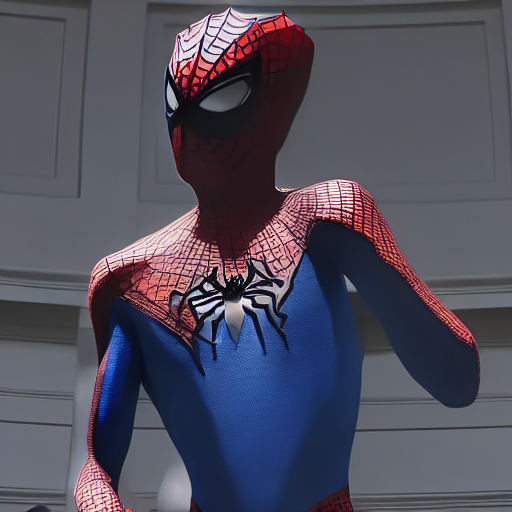

In [4]:
%%time
prompt = "turn him into Spiderman"
pipe(prompt, image=image, num_inference_steps=10, image_guidance_scale=1).images[0]

### Ghibli stock

In [5]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
from io import BytesIO

In [6]:
if torch.cuda.is_available():
  device="cuda"
elif torch.xpu.is_available():
  device="xpu"
else:
  device="cpu"

print("Using device:", device)

model_id = "nitrosocke/Ghibli-Diffusion"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

# Enable memory efficient attention if on XPU
# if device == "xpu":
#     pipe.enable_xformers_memory_efficient_attention()

Using device: cuda


model_index.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

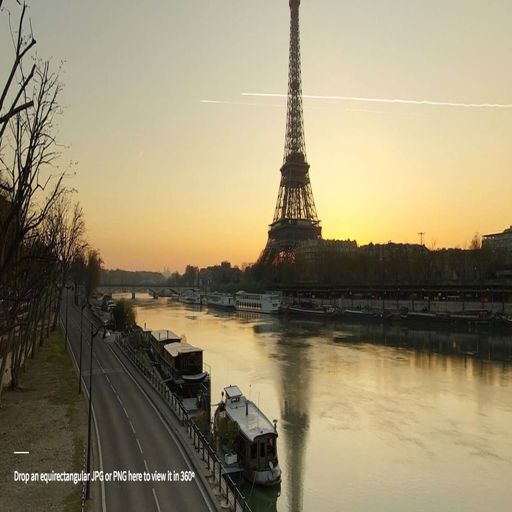

In [7]:
# Load and prepare the image
# url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
url = "https://raw.githubusercontent.com/Experience-Monks/360-image-viewer/refs/heads/master/demo/screenshot.jpg"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
# init_image = Image.open().convert("RGB")
init_image = init_image.resize((512, 512))  # Resize to model's expected input
# init_image = init_image.resize((768, 512))
init_image

  0%|          | 0/37 [00:00<?, ?it/s]

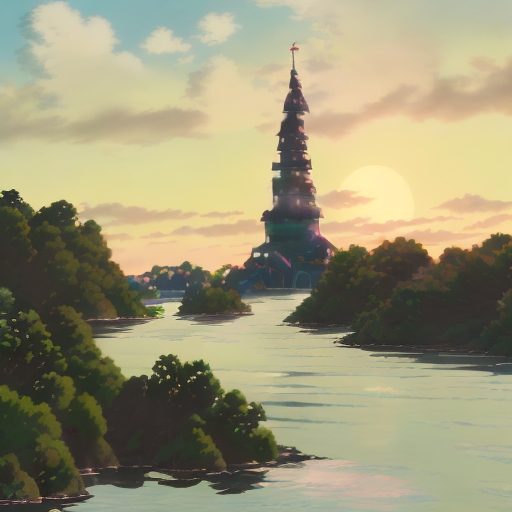

In [8]:
# Generate the Ghibli-style image
prompt = "Convert to ghibli style"

# Run the pipeline
pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5, num_inference_steps=50).images[0]